In [151]:
import numpy as np
import matplotlib.pyplot as plt

In [152]:
from loaders import clean_text_for_pattern_letter
from temp_text_puh import template_str
# input_str = clean_text_for_pattern_letter(template_str, out_len=len(template_str))
input_str = clean_text_for_pattern_letter(template_str, out_len=5000)
print(len(input_str))
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
               'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', '\'', '1']
print(f'{letters=}')

len(letters)=32
5000
letters=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', "'", '1']


In [153]:
def predict_train(input_str,
                  letters,
                  max_history=4,
                  max_index: int = 4,):
    WIN: dict[str, dict[str, int]] = {}

    HistoryHW: list[dict[str, int]] = []
    HistoryW: list[dict[str, dict[str, dict[int, int]]]] = []

    for h_idx in range(max_history):
        HistoryHW.append({})
        HistoryW.append({})

    IDX: list = []

    for letter in letters:
        WIN.setdefault(letter, {})

        for idx in range(max_index):
            WIN[letter].setdefault(idx, 0)

    prev_indices = [0]

    for inp_idx, inp in enumerate(input_str):
        if inp_idx <= 0:
            WIN[inp][prev_indices[0]] += 1
            continue

        IDX.append(prev_indices[0])

        IdxO = {}

        for h_idx in range(max_history):
            prev_idx = inp_idx - 1 - h_idx
            if prev_idx < 0:
                break

            prev_inp = input_str[prev_idx]

            HW = HistoryHW[h_idx]
            W = HistoryW[h_idx]

            key_HW = prev_inp + str(prev_indices[h_idx]) + ':' + inp

            if HW.get(key_HW, -1) != -1:
                inp_has_index = HW[key_HW]

                # idx_strength = W[prev_inp + str(prev_indices[h_idx])][inp][inp_has_index]

                IdxO.setdefault(inp_has_index, 0)
                IdxO[inp_has_index] += 1

        new_index = 0
        if len(IdxO) == 0:
            new_index = min(WIN[inp], key=WIN[inp].get)
        else:
            new_index = max(IdxO, key=IdxO.get)
        WIN[inp][new_index] += 1

        for h_idx in range(max_history):
            prev_idx = inp_idx - 1 - h_idx
            if prev_idx < 0:
                break

            prev_inp = input_str[prev_idx]

            key_I = prev_inp + str(prev_indices[h_idx])
            HistoryW[h_idx].setdefault(key_I, {})
            HistoryW[h_idx][key_I].setdefault(inp, {})
            HistoryW[h_idx][key_I][inp].setdefault(new_index, 0)

            stats = HistoryW[h_idx][key_I][inp][new_index]
            if stats == 0:
                HistoryW[h_idx][key_I][inp][new_index] += 1
            else:
                HistoryW[h_idx][key_I][inp][new_index] += 1 / (32 * stats)

            key_HW = prev_inp + str(prev_indices[h_idx]) + ':' + inp

            HistoryHW[h_idx].setdefault(key_HW, new_index)

        # recurtion
        prev_indices.insert(0, new_index)
        if len(prev_indices) > max_history:
            prev_indices = prev_indices[:-1]
    
    IDX.append(new_index)

    return HistoryW, HistoryHW, IDX

max_index_L1 = 32
max_history_L1 = 11

HistoryW, HistoryHW, IDX = predict_train(input_str, letters, max_history=max_history_L1, max_index=max_index_L1)

print(f'{len(IDX)}')

for h_idx in range(max_history_L1):
    print(f'{h_idx=}')
    for wk, wv in HistoryW[h_idx].items():
        print(wk, wv)


5000
h_idx=0
c0 {'h': {0: 1}}
h0 {'a': {0: 1}, 'o': {4: 1}, 'e': {7: 1}, ' ': {12: 1}, 'i': {30: 1}}
a0 {'p': {0: 1}, 't': {7: 1}, 'i': {18: 1}, 'n': {2: 1}}
p0 {'t': {0: 1}, 'e': {6: 1}}
t0 {'e': {0: 1}, ' ': {2: 1}}
e0 {'r': {0: 1.03125, 25: 1}, 'c': {12: 1}, ' ': {16: 1.0615530303030303, 13: 1}, 't': {4: 1}, 'd': {9: 1.03125}, 's': {22: 1}}
r0 {' ': {0: 1}, 'h': {20: 1}}
 0 {'i': {0: 1.03125}, 'b': {7: 1}, 't': {19: 1.03125}, 'a': {20: 1}, 'l': {1: 1}, 'y': {10: 1}, 'h': {7: 1}, 'g': {4: 1}}
i0 {'n': {0: 1}, ' ': {1: 1}}
n0 {' ': {1: 1.2777938432479792, 14: 1.03125}, 'o': {2: 1}, 'g': {0: 1.0615530303030303, 15: 1}, 'c': {13: 1}, 'e': {20: 1}, "'": {2: 1}}
 1 {'w': {0: 1.0615530303030303}, 'c': {5: 1.03125, 6: 1}, 'o': {24: 1.03125, 2: 1}, 't': {31: 1.1196347139148715, 23: 1}, 'y': {10: 1}, 'i': {9: 1.0909910320871516, 11: 1, 23: 1}, 's': {17: 1.03125, 14: 1}, 'g': {10: 1}, 'n': {5: 1}, 'a': {21: 1, 12: 1}, 'r': {5: 1}, 'b': {21: 1.03125}, 'h': {29: 1.03125}, 'j': {4: 1}}
w0 {'h': {

In [154]:
def reverse_predict_train(input_str: list,
                          IDX: list,
                          max_history=4,):
    HistoryW: list[dict[str, dict[str, dict[int, int]]]] = []
    
    for h_idx in range(max_history):
        HistoryW.append({})

    prev_indices = [0]

    for inp_idx, inp in enumerate(input_str):
        if inp_idx <= 0:
            continue

        new_index = IDX[inp_idx]

        for h_idx in range(max_history):
            prev_idx = inp_idx - 1 - h_idx
            if prev_idx < 0:
                break

            prev_inp = input_str[prev_idx]

            key_I = prev_inp + str(prev_indices[h_idx])
            HistoryW[h_idx].setdefault(key_I, {})
            HistoryW[h_idx][key_I].setdefault(inp, {})
            HistoryW[h_idx][key_I][inp].setdefault(new_index, 0)

            stats = HistoryW[h_idx][key_I][inp][new_index]
            if stats == 0:
                HistoryW[h_idx][key_I][inp][new_index] += 1
            else:
                HistoryW[h_idx][key_I][inp][new_index] += 1 / (32 * stats)

        # recurtion
        prev_indices.insert(0, new_index)
        if len(prev_indices) > max_history:
            prev_indices = prev_indices[:-1]

    return HistoryW


RevHistoryW = reverse_predict_train(input_str[::-1],
                                    IDX[::-1],
                                    max_history=max_history_L1, )

print(f'{len(IDX)=}')

for h_idx in range(max_history_L1):
    print(f'{h_idx=}')
    for wk, wv in RevHistoryW[h_idx].items():
        print(wk, wv)


len(IDX)=5000
h_idx=0
u0 {'o': {4: 1, 2: 1.0909910320871516}, 'd': {0: 1}}
o4 {'y': {12: 1.0615530303030303, 13: 1.0615530303030303, 19: 1.03125, 0: 1, 22: 1, 14: 1.03125}, 't': {8: 1, 14: 1.03125, 23: 1.201378414731495, 4: 1.03125, 24: 1, 9: 1, 6: 1}, 'g': {2: 1, 9: 1, 10: 1}, 'o': {4: 1, 13: 1, 17: 1}, ' ': {14: 1.1196347139148715, 11: 1, 10: 1.0615530303030303, 12: 1.1747776359598883, 13: 1.0615530303030303}, 'l': {11: 1.0909910320871516, 10: 1.0615530303030303}, 'd': {21: 1.0615530303030303, 25: 1}, 'h': {5: 1.0909910320871516, 4: 1, 0: 1}, 'b': {13: 1, 0: 1, 17: 1}, 'n': {5: 1, 25: 1.03125, 15: 1}, 'p': {12: 1.1196347139148715}, 'f': {2: 1, 10: 1, 14: 1}, 'w': {13: 1, 8: 1}, 'r': {25: 1.1475456027178208, 24: 1.0615530303030303, 27: 1}, 'm': {0: 1.03125}, 'v': {4: 1}, 's': {2: 1.1196347139148715, 3: 1, 1: 1, 9: 1, 31: 1, 0: 1}, 'c': {13: 1.03125}}
y12 {' ': {11: 1.0909910320871516}, 'm': {0: 1}}
 11 {'o': {16: 1.0909910320871516, 4: 1.1196347139148715, 15: 1}, 't': {24: 1.061553030

In [155]:
def to_probability(HistoryW: list[dict[str, dict[str, dict[int, int]]]], max_history: int):
    for h_idx in range(max_history):
        W = HistoryW[h_idx]

        for inp_symbol, s_indeces in W.items():
            symbol_stat_sum = 0

            for out_symbol, index_stat in s_indeces.items():
                for index, idx_stat in index_stat.items():
                    symbol_stat_sum += idx_stat

            for out_symbol, index_stat in s_indeces.items():
                for index, idx_stat in index_stat.items():
                    W[inp_symbol][out_symbol][index] = idx_stat / symbol_stat_sum
    
    return HistoryW
        
HistoryW = to_probability(HistoryW, max_history=max_history_L1)
RevHistoryW = to_probability(RevHistoryW, max_history=max_history_L1)

for h_idx in range(max_history_L1):
    for wk, wv in RevHistoryW[h_idx].items():
        print(wk, wv)

u0 {'o': {4: 0.32352083510406143, 2: 0.3529583297918772}, 'd': {0: 0.32352083510406143}}
o4 {'y': {12: 0.01871758502292911, 13: 0.01871758502292911, 19: 0.018183273942881176, 0: 0.017632265641581747, 22: 0.017632265641581747, 14: 0.018183273942881176}, 't': {8: 0.017632265641581747, 14: 0.018183273942881176, 23: 0.021183023344608084, 4: 0.018183273942881176, 24: 0.017632265641581747, 9: 0.017632265641581747, 6: 0.017632265641581747}, 'g': {2: 0.017632265641581747, 9: 0.017632265641581747, 10: 0.017632265641581747}, 'o': {4: 0.017632265641581747, 13: 0.017632265641581747, 17: 0.017632265641581747}, ' ': {14: 0.019741696697283397, 11: 0.017632265641581747, 10: 0.01871758502292911, 12: 0.020713991347034166, 13: 0.01871758502292911}, 'l': {11: 0.019236643690344092, 10: 0.01871758502292911}, 'd': {21: 0.01871758502292911, 25: 0.017632265641581747}, 'h': {5: 0.019236643690344092, 4: 0.017632265641581747, 0: 0.017632265641581747}, 'b': {13: 0.017632265641581747, 0: 0.017632265641581747, 17: 0

In [156]:
def HO_mx_diff(HO: dict[str, dict[int, int]], 
               RHO: dict[str, dict[int, int]],
               eps = 1.0):
    D: dict[str, dict[int, int]] = {}

    diff_sum = 0

    for symbol, sbl_stats in HO.items():
        rho_sbl = RHO.get(symbol, {})
        D.setdefault(symbol, {})

        for index, idx_stats in sbl_stats.items():
            rho_idx_stats = rho_sbl.get(index, 0)

            D[symbol].setdefault(index, 0)

            diff = abs(idx_stats - rho_idx_stats)

            D[symbol][index] += (rho_idx_stats - idx_stats) * eps
            diff_sum += diff

    for symbol, sbl_stats in RHO.items():
        if not HO.get(symbol):
            D.setdefault(symbol, {})

            HO.setdefault(symbol, {})

        for index, idx_stats in sbl_stats.items():
            if not HO[symbol].get(index):
                D[symbol].setdefault(index, idx_stats * eps)

                diff_sum += idx_stats
    
    return D, diff_sum



In [157]:
def get_history_stats(HistoryW, IDX, HO, inp, input_idx, h_idx):
    W = HistoryW[h_idx]
    idx = IDX[input_idx]

    O = W.get(inp + str(idx))

    for symbol, sbl_stats in O.items():
        HO.setdefault(symbol, {})

        for index, idx_stats in sbl_stats.items():
            HO[symbol].setdefault(index, 0)

            HO[symbol][index] += idx_stats

    return HO

In [158]:
def add_to_HW_update(HistoryW: list[dict[str, dict[str, dict[int, int]]]],
                     U: list[dict[str, dict[str, dict[int, int]]]],
                     IDX: list,
                     D: dict[str, dict[int, int]],
                     input: str,
                     inp_idx: int,
                     input_idx: int,
                     h_idx: int,
                     max_history: int, ):
    for h_idx in range(max_history):
        input_idx = inp_idx - h_idx - 1
        if input_idx < 0:
            break

        W = HistoryW[h_idx]
        idx = IDX[input_idx]

        key_I = input[input_idx] + str(idx)

        O = W.get(key_I)

        U[h_idx].setdefault(key_I, {})

        for symbol, sbl_stats in O.items():
            U[h_idx][key_I].setdefault(symbol, {})

            for index, idx_stats in sbl_stats.items():
                U[h_idx][key_I][symbol].setdefault(index, 0)

                U[h_idx][key_I][symbol][index] += idx_stats * D[symbol][index]

    return U


In [159]:
def update_HW(HW: list[dict[str, dict[str, dict[int, int]]]],
              U: list[dict[str, dict[str, dict[int, int]]]], 
              max_history: int, ):
    for h_idx in range(max_history):
        W = HW[h_idx]

        for I, O in W.items():
            for symbol, sbl_stats in O.items():
                for index, idx_stats in sbl_stats.items():
                    update = U[h_idx][I][symbol][index]
                    
                    HW[h_idx][I][symbol][index] += update
    
    return HW

In [160]:
def reverse_feedback(input: str,
                     IDX: list,
                     HistoryW: list[dict[str, dict[str, dict[int, int]]]],
                     RevHistoryW: list[dict[str, dict[str, dict[int, int]]]],
                     max_history=4, ):
    U: list[dict[str, dict[str, dict[int, int]]]] = []
    for hist_idx in range(max_history):
        U.append({})

    DT = []

    eps = 0.1

    for inp_idx, inp in enumerate(input):
        if inp_idx == 0 or inp_idx > (len(input) - 1):
            continue
        # print(f'{inp_idx=}')

        HO: dict[str, dict[int, int]] = {}

        for h_idx in range(max_history):
            input_idx = inp_idx - h_idx - 1
            if input_idx < 0:
                break

            HO = get_history_stats(HistoryW, IDX, HO, input[input_idx], input_idx, h_idx)

        RHO: dict[str, dict[int, int]] = {}

        for h_idx in range(max_history):
            input_idx = inp_idx + h_idx + 1
            if input_idx >= (len(input) - 1):
                break

            # print(f'{input_idx=} {h_idx=}')

            RHO = get_history_stats(RevHistoryW, IDX, RHO, input[input_idx], input_idx, h_idx)

        D, diff = HO_mx_diff(HO=HO, RHO=RHO, eps=eps)
        DT.append(diff)

        U = add_to_HW_update(HistoryW, U, IDX, D, input, inp_idx, input_idx, h_idx, max_history, )
    
    HistoryW = update_HW(HW=HistoryW, U=U, max_history=max_history)

    return HistoryW, DT

In [161]:
def plot_T(T: list):
    T_arr = np.array(T, dtype=float)

    fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
    axs.plot(np.arange(T_arr.size), T_arr)

    plt.show()

In [162]:
HistoryW, DT = reverse_feedback(input=input_str,
                                IDX=IDX,
                                HistoryW=HistoryW,
                                RevHistoryW=RevHistoryW,
                                max_history=max_history_L1, )


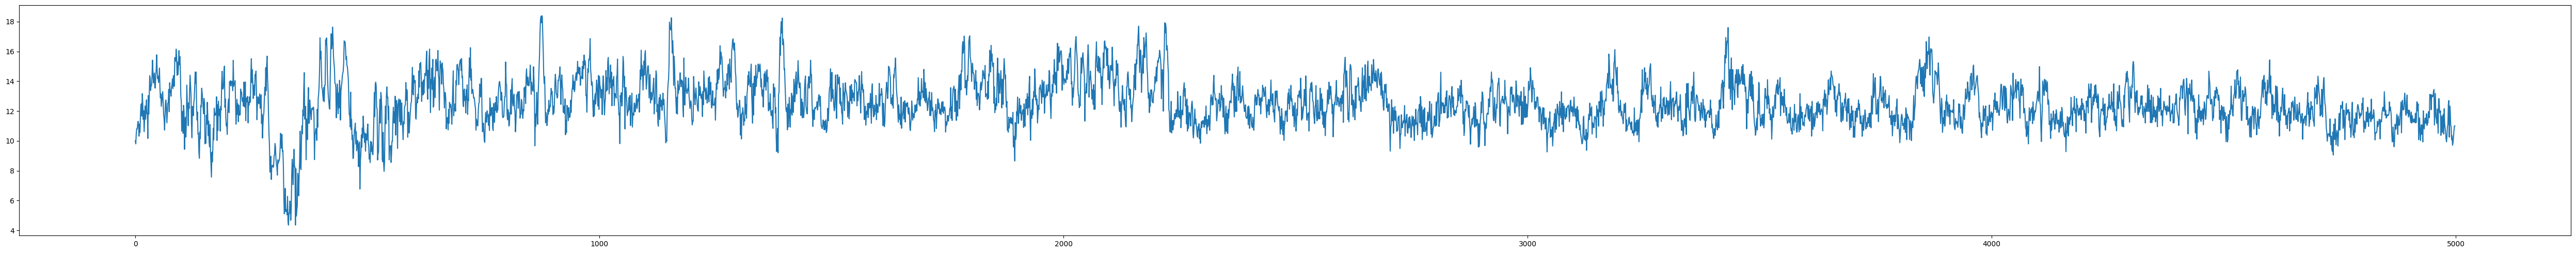

In [163]:
plot_T(T=DT)

In [164]:
def predict(input_str: str, 
            HistoryW: list[dict[str, dict[str, dict[int, int]]]], 
            max_history = 4,
            max_index = 4,):
    err = 0
    TF = []
    AL = []

    history_indices = []
    history_indices.append([x for x in range(max_index)])

    for input_idx, input in enumerate(input_str[:-1]):
        HO: dict[str, dict[int, int]] = {}
        HO_cnt: dict[str, dict[int, int]] = {}

        itr_max_history = 0

        for h_idx in range(max_history):
            # print(f'{h_idx=}')

            inp_idx = input_idx - h_idx
            if inp_idx < 0:
                break

            itr_max_history += 1
            # print(f'{h_idx=} {inp_idx=}')
            W = HistoryW[h_idx]
            inp = input_str[inp_idx]
            indices = history_indices[h_idx]

            key_I = inp + str(indices[0])
            O = W.get(key_I, {})
            # print(f'{O=}')
            # print()

            for index in indices[1:]:
                key_I = inp + str(index)

                index_O = W.get(key_I, {})
                # print(f'{index_O=}')
                # print()

                for key, val in index_O.items():
                    O.setdefault(key, {})
                    O[key].update(val)
            
            # print(f'{O=}')
            # print()
            
            for key_O, val_O in O.items():
                HO.setdefault(key_O, {})
                HO_cnt.setdefault(key_O, {})
                
                for key_index, val_index in val_O.items():
                    HO[key_O].setdefault(key_index, 0)
                    HO_cnt[key_O].setdefault(key_index, 0)

                    # discont = (max_history - h_idx)
                    # discont = pow(0.1, h_idx)
                    discont = pow(2, (max_history - h_idx))

                    HO[key_O][key_index] += val_index * discont
                    HO_cnt[key_O][key_index] += 1

        # print(f'{HO=}')
        # print(f'{HO_cnt=}')
        # print()

        length = 0
        for v in HO.values():
            length += len(v)

        max_arr = []
        for v in HO.values():
            col_max = max(v, key=v.get)
            max_arr.append(col_max)
        
        max_arr = np.array(max_arr)
        # tf = np.mean(np.abs(max_arr - max_arr[np.newaxis].T))

        tf = length
        # tf = len(HO)

        TF.append(tf)

        # max by cnt
        # max_symbol = 'a'
        # max_symbol_index = 0
        # max_val = 0
        # for key, val in HO_cnt.items():
        #     max_idx = max(val, key=val.get)
        #     # HO_cnt[key] = {max_idx: val[max_idx]}

        #     if val[max_idx] > max_val: # 
        #         max_val = val[max_idx]
        #         max_symbol_index = max_idx
        #         max_symbol = key
        # print(f'{max_symbol=}')
        # max by val
        max_symbol = 'a'
        max_symbol_index = 0
        max_val = 0
        # win_cnt = 0
        for key, val in HO.items():
            for index, index_stat in val.items():
                index_cnt = HO_cnt[key][index]
                stat = pow(0.1, (itr_max_history - index_cnt)) * index_stat
                # stat = -0.1 * (itr_max_history - index_cnt) + index_stat

                HO[key][index] = stat

            max_idx = max(val, key=val.get)
            HO[key] = {max_idx: val[max_idx]}

            # max_cnt = HO_cnt[key][max_idx]

            if val[max_idx] > max_val: # and max_cnt >= max_his:
                # print(f'{key=} {val[max_idx]=} {max_cnt=}')
                max_val = val[max_idx]
                max_symbol_index = max_idx
                max_symbol = key
                # win_cnt = max_cnt

        # print(f'{HO=}')
        next_inp = input_str[input_idx + 1]
        print(f'{max_symbol=}', f'{next_inp=} {max_val=} {itr_max_history=} {HO=}', max_symbol_index, max_val)
        # print('')

        # anomaly
        if max_symbol == next_inp:
            AL.append(0)
        else:
            ni_v = HO.get(next_inp, 0)
            if ni_v == 0:
                AL.append(100)
            else:
                max_ni = max(ni_v, key=ni_v.get)
                AL.append(abs(ni_v[max_ni] - max_val))

        new_indices = [max_symbol_index]

        # err
        if max_symbol != next_inp:
            err += 1

            index_stats = HO.get(next_inp, 0)
            
            if index_stats == 0:
                new_indices = [x for x in range(max_index)]
                print(f'{new_indices=}')
            else:
                max_symbol_index = list(index_stats.keys())[0]

                new_indices = [max_symbol_index]
        
        # recurtion
        history_indices.insert(0, new_indices)
        if len(history_indices) > max_history:
            history_indices = history_indices[:-1]

    TF.append(0)
    AL.append(0)
    return err, TF, AL

err_L1, TF_L1, AL_L1 = predict(input_str, HistoryW, max_index=max_index_L1, max_history=max_history_L1)
# err_L1, TF_L1_no, AL_L1_no = predict(input_str, HistoryW, max_index=max_index_L1, max_history=max_history_L1)

print(err_L1, err_L1 / (len(input_str) / 100))

max_symbol='h' next_inp='h' max_val=2564.3640260616876 itr_max_history=1 HO={'h': {0: 2564.3640260616876}, 'e': {5: 2156.731302178345}, 'a': {12: 2074.6859572414683}, 'o': {20: 2140.7077354732987}, 'k': {0: 2237.5866113195507}, 'r': {30: 912.0869821151662}, 'l': {4: 315.07560316087466}, 'i': {22: 293.87845334279115}} 0 2564.3640260616876
max_symbol='a' next_inp='a' max_val=1663.8508766594562 itr_max_history=2 HO={'a': {0: 1663.8508766594562}, 'o': {4: 34.630207065320086}, 'e': {7: 35.19960318738145}, ' ': {12: 395.09804631898743}, 'i': {30: 31.57938294221147}, 'd': {16: 114.5044508666723}, 'n': {24: 12.034028079249822}, 'r': {22: 83.3449908196307}, 'm': {1: 33.48432964314586}, 'u': {5: 114.60852242508898}, 'l': {9: 26.900708389174895}, 'f': {0: 12.092132550539906}} 0 1663.8508766594562
max_symbol='p' next_inp='p' max_val=1442.0394598029698 itr_max_history=3 HO={'p': {0: 1442.0394598029698}, 't': {24: 27.79469257963607}, 'i': {18: 4.59852861806683}, 'n': {2: 4.742621588259984}, ' ': {18

In [165]:
def get_word_stats(input_str: str | list, TF: list, threshold=0.0):
    buffer: list = [input_str[0]]
    WordStats: dict[str, int] = {}
    WordIndex: dict[str, int] = {}
    next_wrd_idx = 0

    NextLayerOut = []
    DownstreamIndex = {}

    prev_tf = TF[0]

    for inp_idx, inp in enumerate(input_str):
        if inp_idx <= 0 and inp_idx >= len(input_str) - 1:
            continue

        # if TF[inp_idx] - prev_tf > 0.0: # and abs(TF[inp_idx] - prev_tf) > 0.2:
        # and TF[inp_idx] > threshold:
        if TF[inp_idx] > prev_tf and TF[inp_idx] > TF[inp_idx + 1]:
            word = ''.join(buffer)

            WordStats.setdefault(word, 0)
            WordStats[word] += 1

            if not WordIndex.get(word):
                WordIndex.setdefault(word, next_wrd_idx)
                next_wrd_idx += 1

            wrd_idx = WordIndex.get(word)
            # NextLayerOut.append(str(wrd_idx))
            NextLayerOut.append(word)

            DownstreamIndex.setdefault(inp_idx, 1)

            buffer = [inp]
            prev_tf = TF[inp_idx]

            continue

        TF[inp_idx] = 0

        buffer.append(inp)
        prev_tf = TF[inp_idx]

    # sort
    WordStats = dict(sorted(WordStats.items(), key=lambda item: item[1], reverse=True))

    NextLayerOut.append(str(next_wrd_idx))
    return WordStats, WordIndex, NextLayerOut, DownstreamIndex


TF_L1 = np.array(TF_L1, dtype='float64')
AL_L1 = np.array(AL_L1, dtype='float64')
TF_L1 /= np.max(TF_L1)
AL_L1 /= np.max(AL_L1)
TF_L1 += AL_L1

TF_max_coef = 0.4

# TF_L1[np.where(TF_L1 < np.mean(TF_L1))] = 0
# TF_1 = TF_L1 - np.pad(TF_L1, (1, 0))[:-1]
# TF_2 = TF_L1 - np.pad(TF_L1, (0, 1))[1:]
# TF_L1 = TF_1 + TF_2

# TF_L1[np.where(TF_L1 < 0)] = 0
# TF_L1[np.where(TF_L1 < TF_max_coef)] = 0
TF_L1 = TF_L1.tolist()

WordStats_L1, WordIndex_L1, NextLayerOut_L1, DownstreamIndex_L1 = get_word_stats(input_str=input_str,
                                                                                 TF=TF_L1, 
                                                                                 threshold=0.0, )
print(len(WordStats_L1))
mean_WS = np.mean(np.array(list(WordStats_L1.values())))
print(f'{mean_WS=}')
WS_len = 0
for key, val in WordStats_L1.items():
    # if len(key.strip()) > 1 and val >= mean_WS:
    if val >= mean_WS:
        WS_len += 1
    print(key, val)
print(f'{WS_len=}')

print(f'{NextLayerOut_L1=}')
print(f'{len(NextLayerOut_L1)=}')

print(f'{WordIndex_L1=}')

print(f'{DownstreamIndex_L1=}')


814
mean_WS=2.14004914004914
 a 46
 t 38
 b 35
 h 29
 s 20
 w 20
he 19
nd 19
 i 17
ng 14
 o 13
 f 13
 c 13
 he 12
er 12
 th 12
ou 12
 y 12
the 11
on 11
th 10
d  10
 p 10
e  10
 r 9
 the 9
 l 9
in 8
at 8
st 8
ll 8
nd  7
ie 7
 n 7
is 7
oph 7
 d 7
y  7
 sa 7
 to 7
 g 7
an 7
 be 6
es 6
ng  6
ow 6
of 6
all 6
aid 6
ooh 6
t  6
s  6
r  6
is  6
as 6
re 5
rs 5
ai 5
or 5
't 5
to 5
im 5
oh 5
en 5
ha 5
ut 5
 li 5
hat 5
f  5
ob 5
uzz 5
ed 5
ra 5
hr 5
and 4
ar 4
 co 4
 ch 4
nt 4
id  4
so 4
n  4
 you 4
id 4
o  4
oi 4
 of 4
his 4
ime 4
ong 4
ea 4
ist 4
le 4
uz 4
el 4
li 4
t i 4
ther 4
ur 4
nch 4
 m 4
we 3
 in 3
 po 3
ome 3
e s 3
mi 3
 bu 3
mp 3
 as 3
nly 3
no 3
ly 3
ny 3
ro 3
 wi 3
ay 3
bo 3
 k 3
now 3
u  3
do 3
be 3
 e 3
es  3
po 3
ame 3
ns 3
 an 3
tly 3
sai 3
ke 3
in  3
was 3
ing  3
he  3
f t 3
t t 3
ir 3
ing 3
ni 3
om 3
ki 3
ee 3
 ho 3
un 3
et 3
ood 3
al 3
tor 2
re  2
ind 2
t is 2
 but 2
at  2
bu 2
 of  2
eels 2
 at 2
ead 2
ed t 2
o y 2
nn 2
e i 2
ho 2
e w 2
e's 2
inn 2
her 2
now  2
wh 2
 ' 2
 q 2
s